# Tensor Network and MPS project

Mi sono voluto condannare a questo progetto, quindi tanto vale tuffarsi nel dolore.

Non capisco un cazzo, ma ci sono alcuni steps logici che mi pare opportuno seguire.

## Installing `lightning`

Ho installato `lightning` durante la hack week. I tests funzionano, e funziona anche il seguente codicino:

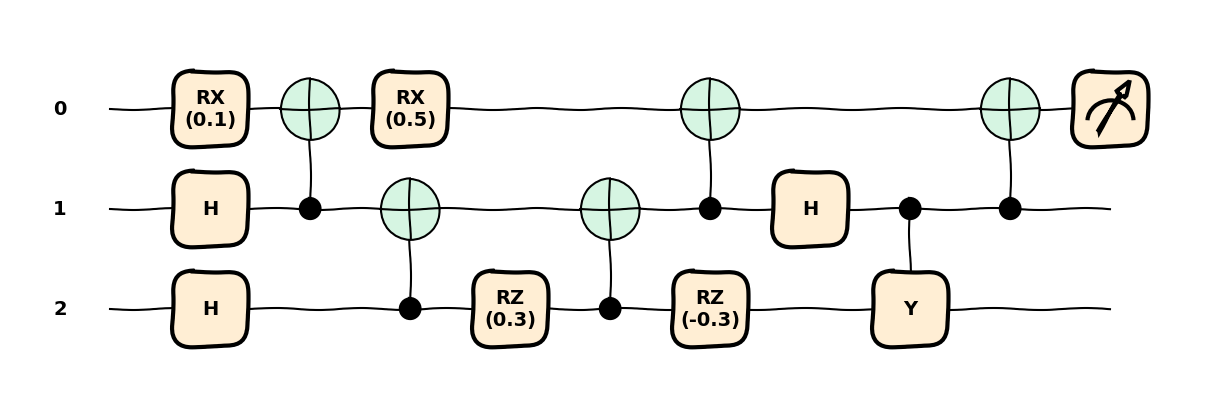

In [1]:
from functools import partial
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("lightning.qubit", wires=3)


def circuit(angles):
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.RX(angles[0], 0)
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[2, 1])
    qml.RX(angles[2], wires=0)
    qml.RZ(angles[1], wires=2)
    qml.CNOT(wires=[2, 1])
    qml.RZ(-angles[1], wires=2)
    qml.CNOT(wires=[1, 0])
    qml.Hadamard(wires=1)
    qml.CY(wires=[1, 2])
    qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(wires=0))


angles = [0.1, 0.3, 0.5]
qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")(angles)
plt.show()

In [8]:
dev = qml.device("lightning.qubit", wires=3)

@qml.qnode(dev)
def circuit(angles):
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.RX(angles[0], 0)
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[2, 1])
    qml.RX(angles[2], wires=0)
    qml.RZ(angles[1], wires=2)
    qml.CNOT(wires=[2, 1])
    qml.RZ(-angles[1], wires=2)
    qml.CNOT(wires=[1, 0])
    qml.Hadamard(wires=1)
    qml.CY(wires=[1, 2])
    qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(wires=0))


angles = [0.1, 0.3, 0.5]

circuit([0.3, 0.1, 0.2], cul="leezzz")

([0.3, 0.1, 0.2],)
{'cul': 'leezzz'}


TypeError: circuit() got an unexpected keyword argument 'cul'

## Installing `quimb`

Prima di tutto ho installato il package `quimb`. Ecco di seguito un esempio zero:

In [ ]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

/home/pietropaolo.frisoni/anaconda3/envs/PennyLane/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [ ]:
data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=inds, tags=tags)
ket

Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET']))

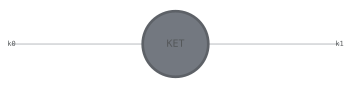

In [ ]:
ket.draw()

Why installing `quimb` first?

Simply because in the `UI/UX` section of [this page](https://www.notion.so/xanaduai/Approximate-simulators-Tensor-Networks-and-MPS-9534d1327c67407db9e5307053db1bbc), it is specified that for the initial release it will be only supported `quimb` (and not `jet`, `cuTensorNet`, etc.).

## Theoretical background

I know (more or less) what a TN is and why they are useful. However, I don't really know how they can be exploited in quantum computing.

Let's ask a couple of question to `ChatGPT` and see if we can learn something cool.

In [ ]:
from pennylane.devices.experimental.mps_qubit import MPSQubit

In [ ]:
n_layers = 5
n_wires = 10
num_qscripts = 5

shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires)
rng = qml.numpy.random.default_rng(seed=42)

qscripts = []
for i in range(num_qscripts):
    params = rng.random(shape)
    op = qml.StronglyEntanglingLayers(params, wires=range(n_wires))
    qs = qml.tape.QuantumScript([op], [qml.expval(qml.PauliZ(0))])
    qscripts.append(qs)

dev = MPSQubit()
new_batch, post_processing_fn = dev.preprocess(qscripts)
results = dev.execute(new_batch)
post_processing_fn(results)


ValueError: too many values to unpack (expected 2)

In [ ]:
qscripts

[<QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=1>,
 <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=1>,
 <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=1>,
 <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=1>,
 <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=1>]

In [ ]:
boh = dev.preprocess(qscripts)

In [ ]:
boh

([<QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=150>,
  <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=150>,
  <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=150>,
  <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=150>,
  <QuantumScript: wires=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], params=150>],
 <function pennylane.transforms.batch_transform.map_batch_transform.<locals>.processing_fn(res: Tuple[~Result]) -> Tuple[~Result]>,
 ExecutionConfig(grad_on_execution=False, use_device_gradient=False, gradient_method=None, gradient_keyword_arguments={}, device_options={}, interface='autograd', derivative_order=1))

In [ ]:
dev.execute(boh)

AttributeError: 'list' object has no attribute 'wires'

In [ ]:
from pennylane.tape import QuantumScript